In [1]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3

3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 20:58:55) 
[Clang 11.0.0 ]
pjr3.py complete


In [2]:
print ("two vals of pi", np.pi, pi)

two vals of pi 3.141592653589793 3.141592653589793


$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [3]:
findNiceContours?

Signature: findNiceContours(data, nlevs=None, rmClev=None, sym=None, verbose=None)
Docstring:
Find Nice Contours
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
nlevs = approximate number of contour levels to return (default 10)
rmClev = if defined delete the contour level near this value
sym = if defined make the contour intervals symmetric about zero
verbose = if defined, print out some info to help debug
File:      ~/Python/pjr3.py
Type:      function


In [4]:
plotZMf?

Signature: plotZMf(data, x, y, plotOpt=None, modelLevels=None, surfacePressure=None, axesa=None, fig=None)
Docstring:
Create a zonal mean contour plot of one variable
axesa = the axes that we make the plot on 
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
x = 1d numpy array of latitude
y = 1d numpy array of pressures (or pseudo pressure (like eta))
plotOpt is a optional dictionary with plotting options:
  'scale_factor': multiply values with this factor before plotting
  'units': a units label for the colorbar
  'clevs': use list of values as contour intervals
  'cmap': the color map to use
  'cabv': the above color
  'cbel': the below color
  'colorbar': location of colorbar ('bot','top','left','right','None')
  'rmClev': contour level to delete; frequently Zero, see findNiceContours
  'title': a title for the plot
  'ybot': if present, the pressure at the plot bottom
  'ytop': if present, the pressure at the top
modelLevels:  If present a small 

In [5]:
from nco import Nco

In [16]:
# identify a model case directory, and a directory to store remapped climo files
import os
#host = os.environ.get('HOST')
#print(host)
#print(os.environ)
import platform
host = platform.node()
print(host)
filename = os.path.expanduser('~/my_folder/output.txt')
if ('cori' in host):
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*-06.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.*.nc'
    indir = '/global/cscratch1/sd/ogaruba/acme_scratch/cori-haswell/archive/E1850C5CLM45CNMC.ne30_oECv3_3/atm/hist/E1850C5CLM45CNMC.ne30_oECv3_3.cam.h0.0049-06.nc'
else:
    indir = os.path.expanduser('~/NetCDF_Files/vd05_ANN_climo.nc')
print(indir)
#print('exists',os.path.exists(indir))
DS = xr.open_mfdataset(indir).chunk({'time': 20})
print(DS)
weights = DS.area
weights.name = 'weights'
#print(weights)
#print(weights.sum(),4.*pi)
#Var = DS.FSNT.isel(time=0)
Var = DS.FSNT - DS.FLNT
print(Var.shape)
#Varwt = Var.weighted(weights)
#print(Varwt)
#Varmean = Varwt.mean('ncol')
#print(Varmean)
Varm2 = Var.weighted(weights).mean('ncol')
print('area weighted mean', Varm2.values)

WE36375
/Users/d3x345/NetCDF_Files/vd05_ANN_climo.nc
exists True
<xarray.Dataset>
Dimensions:              (cosp_ht: 40, cosp_htmisr: 16, cosp_prs: 7, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7, cosp_tau_modis: 6, ilev: 73, lat: 192, lev: 72, lon: 288, nbnd: 2, slat: 191, slon: 288, time: 1)
Coordinates:
  * lat                  (lat) float64 -89.76 -89.06 -88.12 ... 89.06 89.76
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_htmisr          (cosp_htmisr) float64 -99.0 0.25 0.75 ... 16.0 58.0
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_scol            (cosp_scol) int32 1 2 3 4 5 6 7 8 9 10
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+

[[[ -92.38598633  -92.38598633  -92.38597107 ...  -92.38592529
    -92.38597107  -92.38598633]
  [ -92.4004364   -92.4004364   -92.4004364  ...  -92.4004364
    -92.4004364   -92.4004364 ]
  [ -92.85410309  -92.85395813  -92.85351562 ...  -92.85276794
    -92.85351562  -92.85395813]
  ...
  [-124.05451965 -124.05448914 -124.05443573 ... -124.05433655
   -124.05443573 -124.05448914]
  [-123.99300385 -123.99300385 -123.99300385 ... -123.99300385
   -123.99300385 -123.99300385]
  [-123.97952271 -123.97952271 -123.97949982 ... -123.97947693
   -123.97949982 -123.97952271]]]


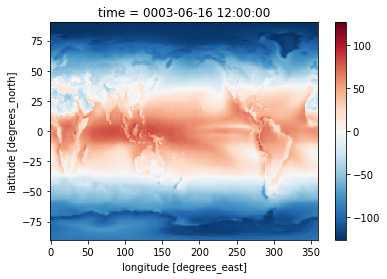

In [17]:
print(Varm2.values)
Varm2.plot()

In [18]:
Varm2.shape 
print(Varm2)
#Varm2.compute_chunk_sizes()
Varm2gra = Varm2.rolling(center=True, time=12).mean()
Varm2gra.plot()

<xarray.DataArray (time: 1, lat: 192, lon: 288)>
dask.array<truediv, shape=(1, 192, 288), dtype=float64, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.76 -89.06 -88.12 -87.17 ... 88.12 89.06 89.76
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0003-06-16 12:00:00


ValueError: For window size 12, every chunk should be larger than 6, but the smallest chunk size is 1. Rechunk your array
with a larger chunk size or a chunk size that
more evenly divides the shape of your array.

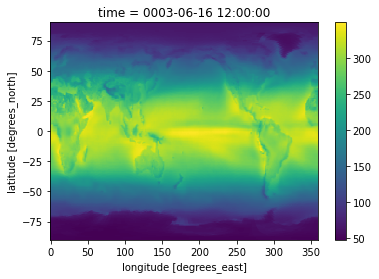

In [19]:
FSNT = DS.FSNT
FSNTg = FSNT.weighted(weights).mean('ncol')
FSNTg.plot()

In [20]:
import os
inCmd='ncdump -h '+indir
outCmd = os.popen(inCmd).read()
print(inCmd)
print(outCmd)

ncdump -h /Users/d3x345/NetCDF_Files/vd05_ANN_climo.nc
netcdf vd05_ANN_climo {
dimensions:
	lat = 192 ;
	lon = 288 ;
	slat = 191 ;
	slon = 288 ;
	nbnd = 2 ;
	time = UNLIMITED ; // (1 currently)
	lev = 72 ;
	cosp_ht = 40 ;
	cosp_sr = 15 ;
	cosp_htmisr = 16 ;
	cosp_tau = 7 ;
	cosp_prs = 7 ;
	cosp_tau_modis = 6 ;
	ilev = 73 ;
	cosp_sza = 5 ;
	cosp_scol = 10 ;
	chars = 8 ;
variables:
	double lat(lat) ;
		lat:long_name = "latitude" ;
		lat:standard_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:bounds = "lat_bnds" ;
	double lon(lon) ;
		lon:long_name = "longitude" ;
		lon:standard_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:bounds = "lon_bnds" ;
	double slat(slat) ;
		slat:long_name = "latitude for staggered FV grid" ;
		slat:units = "degrees_north" ;
	double slon(slon) ;
		slon:long_name = "longitude for staggered FV grid" ;
		slon:units = "degrees_east" ;
	double lat_bnds(lat, nbnd) ;
		lat_bnds:long_name = "gridcell latitude 

In [21]:
T = DS.T
print(T)

<xarray.DataArray 'T' (time: 1, lev: 72, lat: 192, lon: 288)>
dask.array<open_dataset-d6c209748b9320ea376d1cbe4f0ac4c9T, shape=(1, 72, 192, 288), dtype=float32, chunksize=(1, 72, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.76 -89.06 -88.12 -87.17 ... 88.12 89.06 89.76
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 0.1238 0.1828 0.2699 0.3986 ... 986.2 993.8 998.5
  * time     (time) object 0003-06-16 12:00:00
Attributes:
    mdims:         9
    units:         K
    long_name:     Temperature
    cell_methods:  time: mean


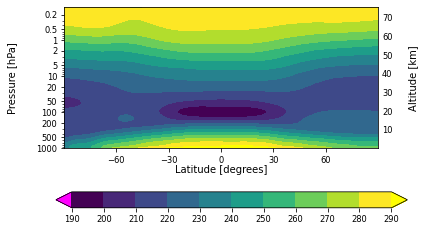

In [22]:
#DS = xr.open_dataset('~/NetCDF_Files/vd05_ANN_climo.nc')
#print (DS.T) 
T = DS.T.isel(time=0)
#T?
TZ = T.mean(dim='lon')
#TZ?
lev = TZ['lev']
lat = TZ['lat']
vals = TZ.values
plotZMf(vals, lat, lev)


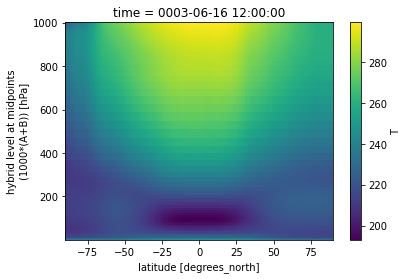

In [23]:
TZ.plot()
plt.show()

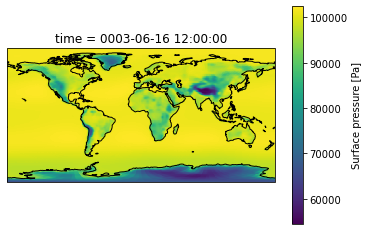

In [24]:
da = DS.PS# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() 



da.plot()
plt.show()

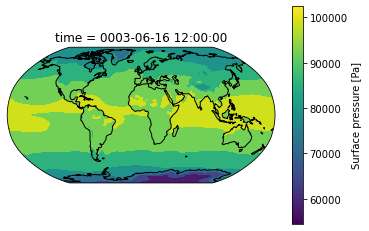

In [25]:
TS = DS.TS# Draw coastlines of the Earth
TS = TS.isel(time=0)
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
lon = TS['lon']
lat = TS['lat']
ax.contourf(lon, lat, TS, transform=ccrs.PlateCarree())

da.plot()
plt.show()